In [1]:
import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information


17:23:53 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.4)


In [2]:


TGM_native = reader_ROMS_native.Reader('/g/data/fu5/deg581/SA_model/ocean_his_garkgw_2018_full.nc')
o.add_reader(TGM_native)



17:23:53 INFO    opendrift.readers.reader_ROMS_native:84: Opening dataset: /g/data/fu5/deg581/SA_model/ocean_his_garkgw_2018_full.nc
17:23:53 INFO    opendrift.readers.reader_ROMS_native:100: Opening file with Dataset
17:23:55 INFO    opendrift.readers.reader_ROMS_native:176: 'gls_cmu0'
17:23:55 INFO    opendrift.readers.reader_ROMS_native:177: Did not find complete set of GLS parameters
17:23:55 WARNING opendrift.readers.basereader.structured:44: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by supplying a valid projection to the reader.
17:23:55 INFO    opendrift.readers.basereader.structured:59: Making interpolator for lon,lat to x,y conversion...


In [3]:
from datetime import timedelta,datetime

seed_time = [TGM_native.start_time, TGM_native.start_time + timedelta(hours=24*7)]
seed_number=24*7*3*2 #24*7*2 = 24 hrs * 7 days * 2weeks * 3 locations
seed_lons=np.array([np.ones(seed_number//3)*138.4674,np.ones(seed_number//3)*138.485,np.ones(seed_number//3)*138.462347]).ravel()
seed_lats=np.array([np.ones(seed_number//3)*-34.72596,np.ones(seed_number//3)*-34.96313,np.ones(seed_number//3)*-35.12587]).ravel()
seed_z=np.array([np.ones(seed_number//3)*-6,np.ones(seed_number//3)*-6,np.ones(seed_number//3)*-6]).ravel()
o.seed_elements(lon=seed_lons, lat=seed_lats, radius=1000, number=seed_number,
                z=seed_z, time=seed_time)



In [4]:

o.run(steps=24*7*2,time_step=3600)


17:23:57 INFO    opendrift.models.basemodel:2575: Fallback values will be used for the following variables which have no readers: 
17:23:57 INFO    opendrift.models.basemodel:2578: 	x_wind: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	y_wind: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	sea_surface_wave_significant_height: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	surface_downward_x_stress: 0.000000
17:23:57 INFO    opendrift.models.basemodel:2578: 	surface_downward_y_stress: 

--------------------
Reader performance:
--------------------
roms native
 0:01:00.7  total
 0:00:00.0  preparing
 0:00:58.2  reading
 0:00:05.8  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
 0:00:02.4  rotating vectors
--------------------
global_landmask
 0:00:00.3  total
 0:00:00.0  preparing
 0:00:00.2  reading
 0:00:00.0  masking
--------------------
Performance:
 1:27.1 total time
    4.2 configuration
    9.4 preparing main loop
      9.1 making dynamical landmask
      0.0 moving elements to ocean
   1:06.1 readers
        0.4 global_landmask
        2.4 postprocessing
 1:13.1 main loop
     1:01.8 roms native
      0.3 updating elements
    0.3 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.10.4)
	490 active Lagrangian3DArray particles  (518 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  ocean_vertical_diffusivity
  sea_floor_depth_below_sea_level
  upward_sea_water_velocity
  x_sea_water_velocity

Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #491 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included b

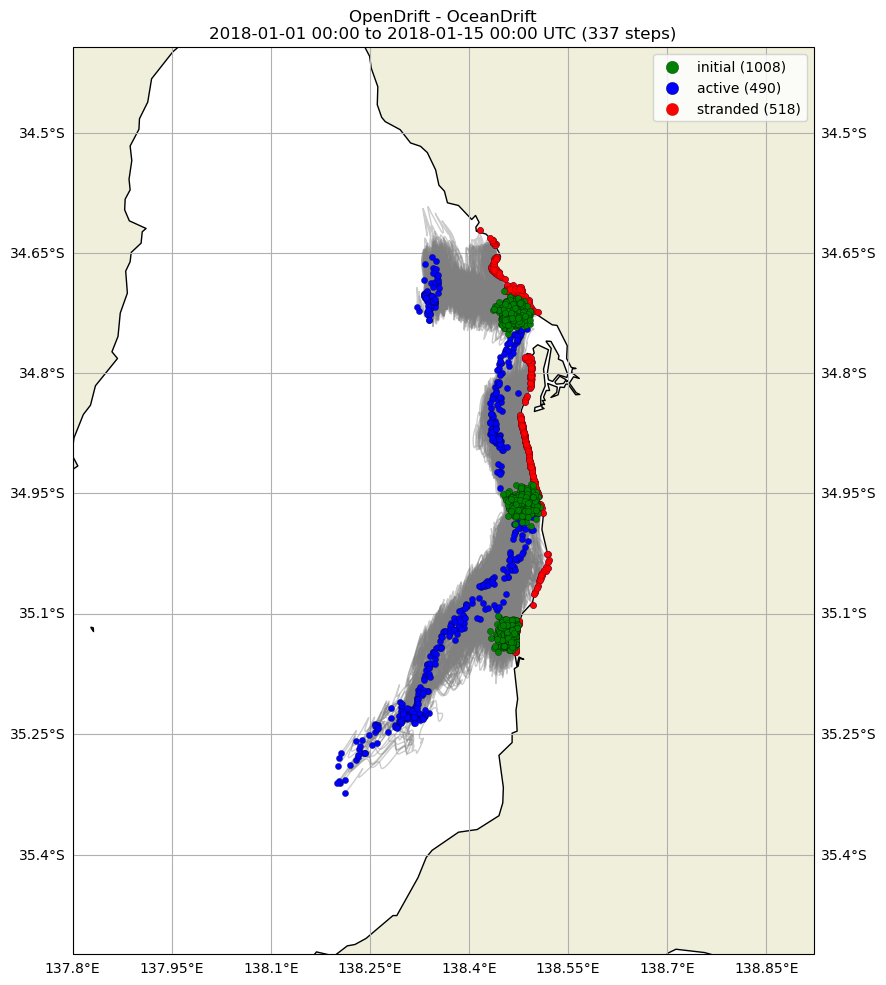

(<GeoAxesSubplot: title={'center': 'OpenDrift - OceanDrift\n2018-01-01 00:00 to 2018-01-15 00:00 UTC (337 steps)'}>,
 <Figure size 894.786x1100 with 1 Axes>)

In [5]:

print(o)
o.plot()

In [6]:
o.history['lon'].shape

(1008, 337)

In [7]:
times = [o.start_time + n * o.time_step_output
         for n in range(o.steps_output)]

In [8]:
times

[datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 1, 1, 1, 0),
 datetime.datetime(2018, 1, 1, 2, 0),
 datetime.datetime(2018, 1, 1, 3, 0),
 datetime.datetime(2018, 1, 1, 4, 0),
 datetime.datetime(2018, 1, 1, 5, 0),
 datetime.datetime(2018, 1, 1, 6, 0),
 datetime.datetime(2018, 1, 1, 7, 0),
 datetime.datetime(2018, 1, 1, 8, 0),
 datetime.datetime(2018, 1, 1, 9, 0),
 datetime.datetime(2018, 1, 1, 10, 0),
 datetime.datetime(2018, 1, 1, 11, 0),
 datetime.datetime(2018, 1, 1, 12, 0),
 datetime.datetime(2018, 1, 1, 13, 0),
 datetime.datetime(2018, 1, 1, 14, 0),
 datetime.datetime(2018, 1, 1, 15, 0),
 datetime.datetime(2018, 1, 1, 16, 0),
 datetime.datetime(2018, 1, 1, 17, 0),
 datetime.datetime(2018, 1, 1, 18, 0),
 datetime.datetime(2018, 1, 1, 19, 0),
 datetime.datetime(2018, 1, 1, 20, 0),
 datetime.datetime(2018, 1, 1, 21, 0),
 datetime.datetime(2018, 1, 1, 22, 0),
 datetime.datetime(2018, 1, 1, 23, 0),
 datetime.datetime(2018, 1, 2, 0, 0),
 datetime.datetime(2018, 1, 2, 1, 0)

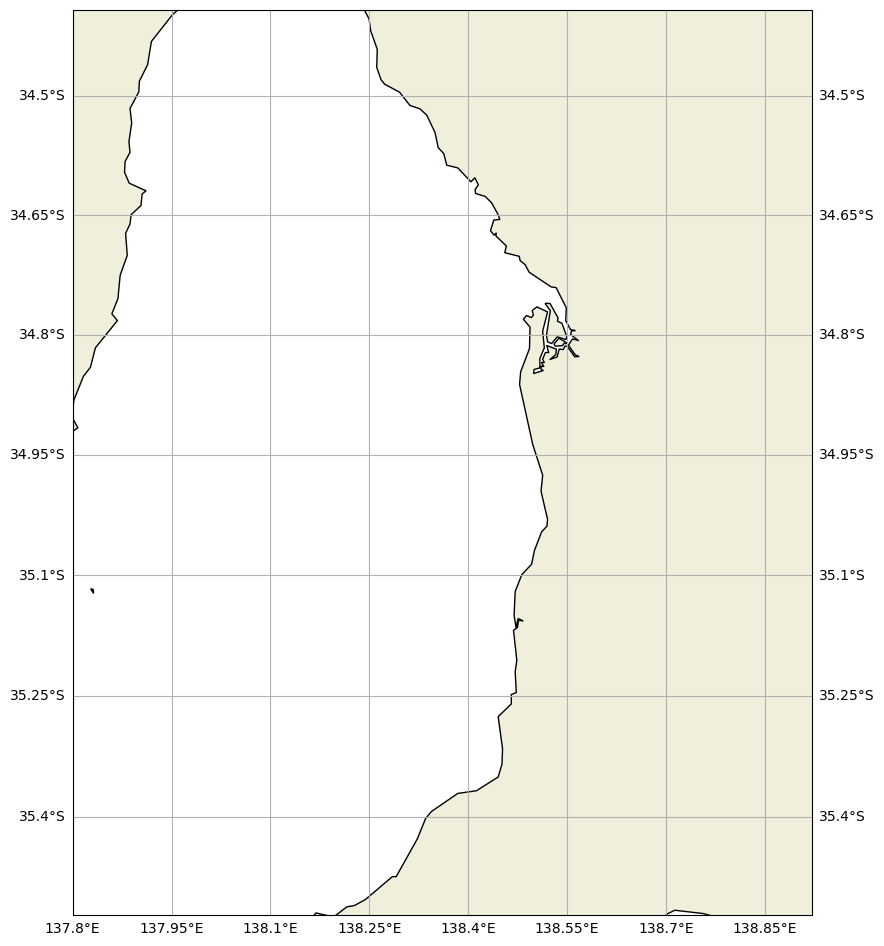

17:28:52 INFO    opendrift.models.basemodel:3832: Time to make animation: 0:00:02.995128


In [10]:
o.animation()